# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

## Preprocessing imports

In [2]:
from sklearn.model_selection import train_test_split

In [36]:
df_v1 = pd.DataFrame({
    'x':np.random.normal(0,1,10000),
    'var':np.ones(10000),
})
df_v2 = pd.DataFrame({
    'x':np.random.normal(0,2,10000),
    'var':[2] * 10_000,
})

df = pd.concat([df_v1, df_v2])
df = df[(df['x'] > -2) & (df['x'] < 2)]

In [37]:
n_1 = df[df['var'] == 1].shape[0]
n_2 = df[df['var'] == 2].shape[0]
df = df.iloc[n_1-n_2:]

In [38]:
features = ['x']
# features = ['q2','k','l','p']
targets_single = ['var']

X_train, X_test, y_train, y_test = train_test_split(df[features], df[targets_single])

## EDA

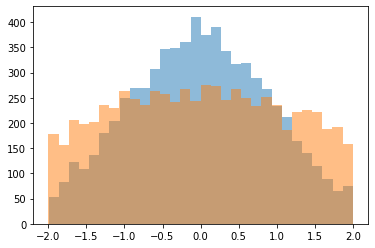

In [40]:
plt.hist(df.loc[df['var'] == 1, 'x'], alpha=0.5, density=False, bins=30)
plt.hist(df.loc[df['var'] == 2, 'x'], alpha=0.5, density=False, bins=30)
plt.show()

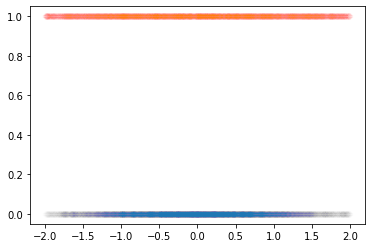

In [75]:
plt.scatter(df.loc[df['var'] == 1, 'x'], np.zeros_like(df.loc[df['var'] == 1, 'x']), alpha=.005, s=30)
plt.scatter(df.loc[df['var'] == 2, 'x'], np.ones_like(df.loc[df['var'] == 2, 'x']), alpha=.005, s=30)

# Model Creation and Evaluation

## ML Imports

In [41]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neural_network import MLPRegressor

## Modelling

### XGBoost

In [61]:
#  XGB REGRESSOR
xgb_reg = XGBRegressor(n_estimators=1000, max_depth=1, learning_rate=0.1, subsample=1, random_state=123123)
xgb_reg.fit(X_train, y_train[targets_single])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
X_test_norm = np.random.normal(0,1,3000)
X_test_norm = X_test_norm[X_test_norm > -2]
X_test_norm = X_test_norm[X_test_norm < 2]
sm_prediction = xgb_reg.predict(X_test_norm)

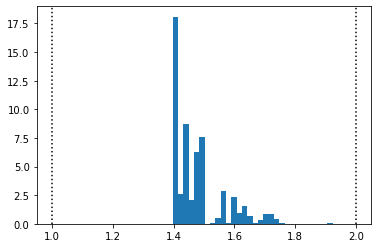

In [87]:
target_lines = y_test['var'].unique()
plt.hist(sm_prediction, bins=30,density=True)
for l in target_lines:
    plt.axvline(l, c='black', linestyle=':')
plt.show()

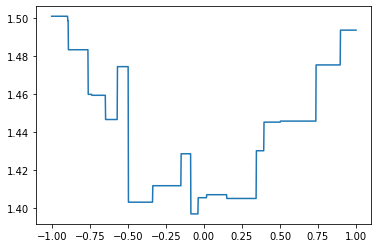

In [85]:
plt.plot(np.linspace(-1,1, 1000), xgb_reg.predict(np.linspace(-1,1, 1000)))

In [76]:
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

/Users/oskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPRegressor()

In [77]:
mlp_pred = mlp_reg.predict(X_test)


In [78]:
mlp_pred

array([1.43914761, 1.6363816 , 1.48572527, ..., 1.46032319, 1.40082094,
       1.40068953])